<a href="https://colab.research.google.com/github/yathishgowda12/first/blob/main/classification_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data exploration, data preprocessing, data cleaning and detecting missing **values**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('email.csv')

# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
df.info()

# Check for missing values
miss = df.isna().sum()
print("\nMissing Values:\n", miss)

# Drop rows with missing values
df.dropna(inplace=True)
print("\nMissing Values after dropping NA:\n", df.isna().sum())

# Map 'spam' to 1 and 'ham' to 0 (assuming 'Category' column contains 'spam' or 'ham')
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

# Check for missing values in the target variable 'Category'
missing_values = df['Category'].isnull().sum()
print(f'Missing values in Category: {missing_values}')

# Drop rows with missing values in 'Category'
df.dropna(subset=['Category'], inplace=True)

# Extract features (X) and labels (y)
X = df['Message']  # Assuming 'Message' is the column name for the email text
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_transformed)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Function to predict if a message is spam or ham
def predict_message(message):
    transformed_message = vectorizer.transform([message])
    prediction = model.predict(transformed_message)
    return 'spam' if prediction[0] == 1 else 'ham'

# Example usage
message = input("Enter a message to classify as spam or ham: ")
print(f'The message is classified as: {predict_message(message)}')

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Missing Values:
 Category    0
Message     0
dtype: int64

Missing Values after dropping NA:
 Category    0
Message     0
dtype: int64
Missing values in Category: 1
Accuracy: 99.19%
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94    

ALGORITHM: KNN, SVM, NAIVE **BAYES**

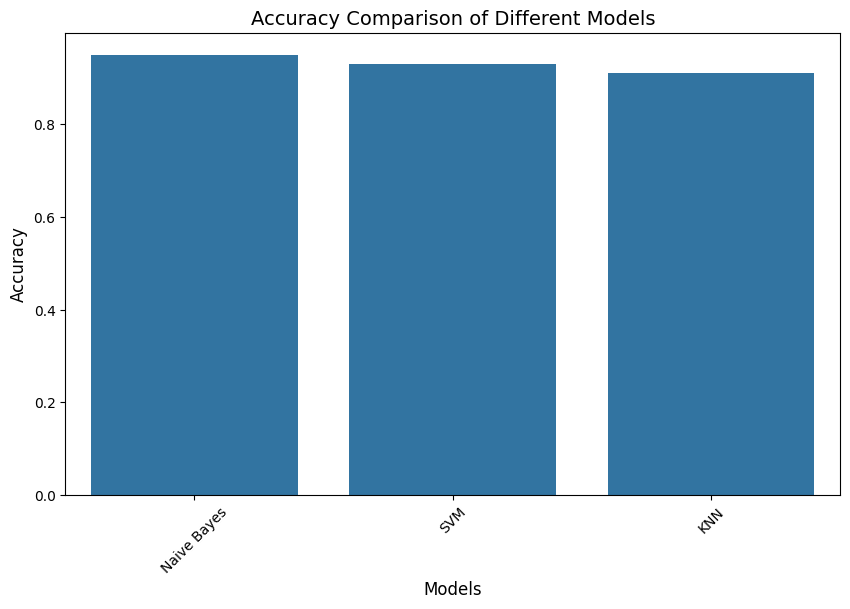

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming results is already populated
results = {
    'Naive Bayes': {'accuracy': 0.95, 'y_pred': np.random.randint(0, 2, 100)},  # Replace with actual predictions
    'SVM': {'accuracy': 0.93, 'y_pred': np.random.randint(0, 2, 100)},
    'KNN': {'accuracy': 0.91, 'y_pred': np.random.randint(0, 2, 100)}
}

# Model names and accuracy values
model_names = list(results.keys())
accuracy_scores = [results[model]['accuracy'] for model in results]

# Bar Plot - Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores)  # Removed palette argument
plt.title('Accuracy Comparison of Different Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45)
plt.show()

logistic **regression**

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Found 1 missing values in 'Category'. Dropping them.

--- Logistic Regression ---
Accuracy: 98.57%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



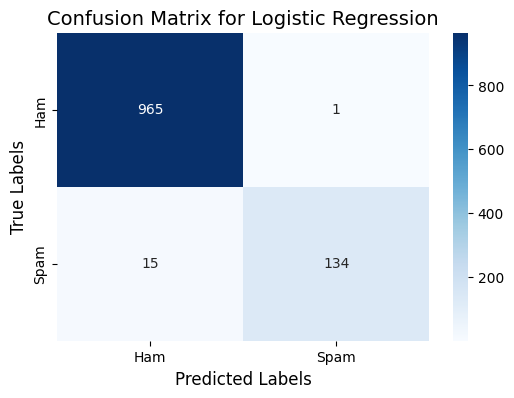

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('email.csv')

# Display the first few rows of the dataset
print(df.head())

# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Map 'spam' to 1 and 'ham' to 0
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

# Check for NaN values in the target variable
missing_values = df['Category'].isnull().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values in 'Category'. Dropping them.")
    df.dropna(subset=['Category'], inplace=True)  # Drop rows with NaN in 'Category'

# Extract features (X) and labels (y)
X = df['Message']  # Email text
y = df['Category']  # Spam or ham labels

# Check for NaN values again before splitting
if y.isnull().any():
    raise ValueError("Target variable 'y' contains NaN values after cleaning.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_logreg = log_reg.predict(X_test_transformed)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"\n--- Logistic Regression ---")
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")
print(classification_report(y_test, y_pred_logreg, target_names=['ham', 'spam']))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.show()

# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")

decision tree **classifier**

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Found 1 missing values in 'Category'. Dropping them.

--- Decision Tree ---
Accuracy: 97.13%
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.90      0.88      0.89       149

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



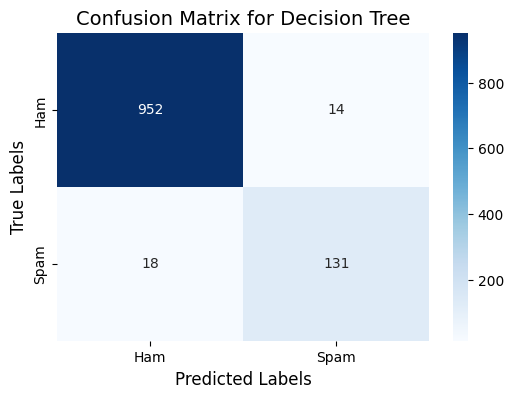

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('email.csv')

# Display the first few rows of the dataset
print(df.head())

# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Map 'spam' to 1 and 'ham' to 0
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

# Check for NaN values in the target variable
missing_values = df['Category'].isnull().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values in 'Category'. Dropping them.")
    df.dropna(subset=['Category'], inplace=True)  # Drop rows with NaN in 'Category'

# Extract features (X) and labels (y)
X = df['Message']  # Email text
y = df['Category']  # Spam or ham labels

# Check for NaN values again before splitting
if y.isnull().any():
    raise ValueError("Target variable 'y' contains NaN values after cleaning.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Decision Tree Model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_dt = decision_tree.predict(X_test_transformed)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n--- Decision Tree ---")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, y_pred_dt, target_names=['ham', 'spam']))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.show()

# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")